# Prima Exploratory data analysis

In [4]:
import os
import sys
#SERVE PER POTER IMPORTARE I FILE .PY DALLA CARTELLA SOURCE
sys.path.append('..')
sys.path.append('..\data')


In [5]:
#ora src è un pacchetto e posso usare la classica dot notation di python
from src.data_load_notebook  import *
#import pandas as pd
# ||||||||||è un utilizzo un pò improprio di import, basta ricordare che così importiamo pandas
from src import classes
from src import funzioni
from src import cluster_routine
import numpy as np


In [6]:
from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pass

importo la classe (*Spettri*) dedicata a contenere dati e picchi dei campioni.
Moduli (*.peakfinder* e *.seriepeak*) dedicati al trovare picchi in base a delle proprietà immagazzinate negli attributi dell'istanza

In [7]:
picchi1 = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':1.5*10**-6})

picchi2 = classes.Spettri(data2,npicchi=None,prop={'height':(None,None),'prominence':1.5*10**-6})


## per vedere subito qualche spettro

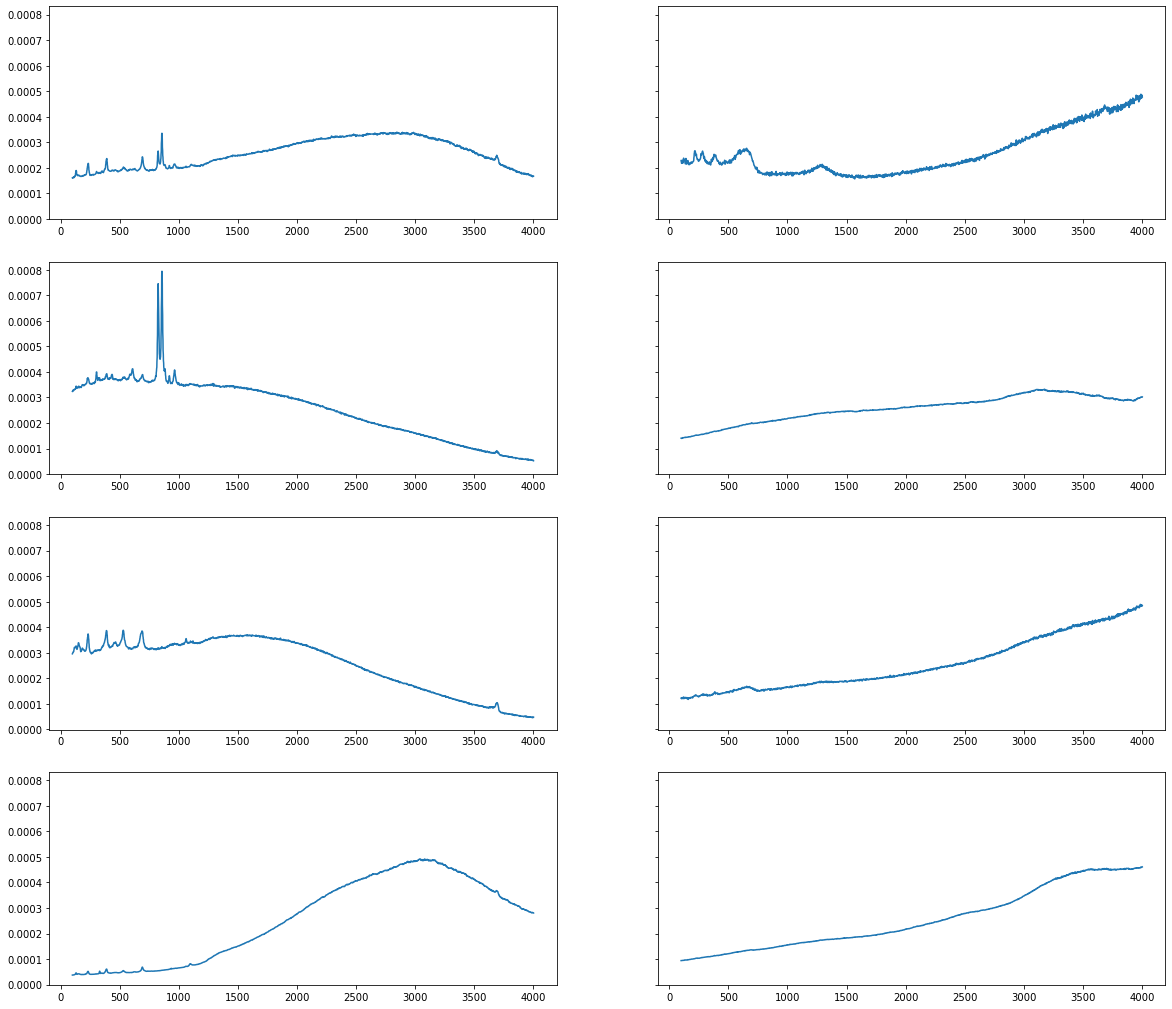

In [10]:
picchi1.peakfinder()
picchi2.peakfinder()
fig,axes = plt.subplots(4,2,figsize=(20,18),sharey=True)
chosen1 = choice(picchi1.data.drop('K',axis=1).columns,4)
chosen2 = choice(picchi2.data.drop('K',axis=1).columns,4)
for n in range(4):
    axes[n,0].plot(picchi1.data['K'],picchi1.data[chosen1[n]])
    
for n in range(4):
    axes[n,1].plot(picchi2.data['K'],picchi2.data[chosen2[n]])



### Come funziona scipy.signals.find_peaks?
le proprietà selezionabili come threshold o intervallo di accettazione per la ricerca di picchi sono:

- height : altezza rispetto allo zero 
- width : larghezza rispetto all'altezza in un intervallo di punti adiacenti customizzabile con il parametro **distance**
- prominence : parametro **fondamentale** , determina quello che anhe ad occhio diremo un picco evidente
- threshold


### come cambia il numero di picchi trovati con i limiti sui nostri parametri?

<Figure size 720x576 with 0 Axes>

#### PROMINENCE [spoiler : sarà il parametro favorito per la ricerca dei picchi]

<AxesSubplot:>

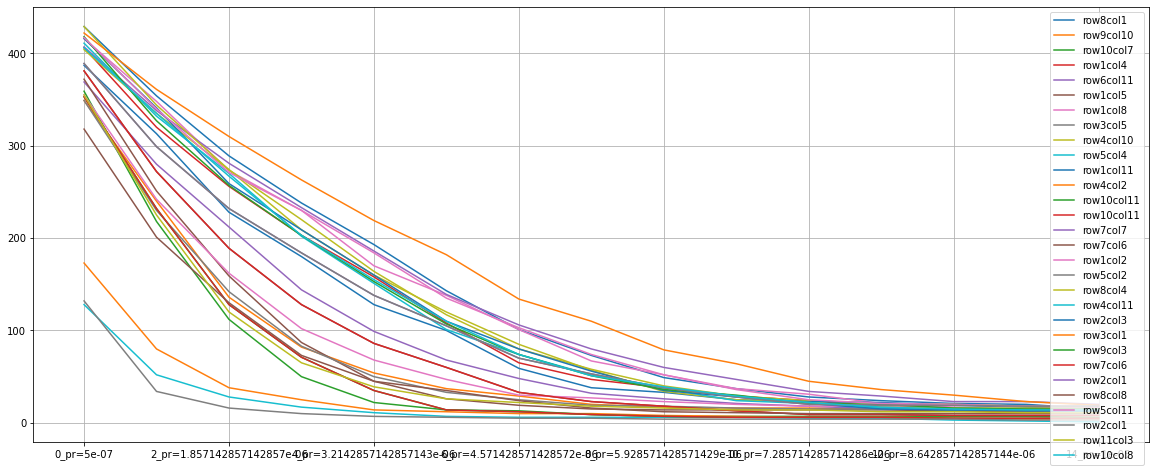

In [43]:
#come cambia in funzione della prominence il numero di picchi che vengono trovati?
dic = pd.DataFrame({})
featp = []
for n,pr in enumerate(np.linspace(0.5*10**-6,10**-5,15)): # NOTARE INTERVALLO 10^-6  10^-5 
    cl = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':pr, 'width':(None,None)})
   
    cl.peakfinder()
    featp.append(cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_pr={pr}']= featp[n]['count']
    del cl
    
dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],30)].plot(figsize=(20,8),grid=True, xlim=(None,None))
    

#### HEIGHT [bad]

<AxesSubplot:>

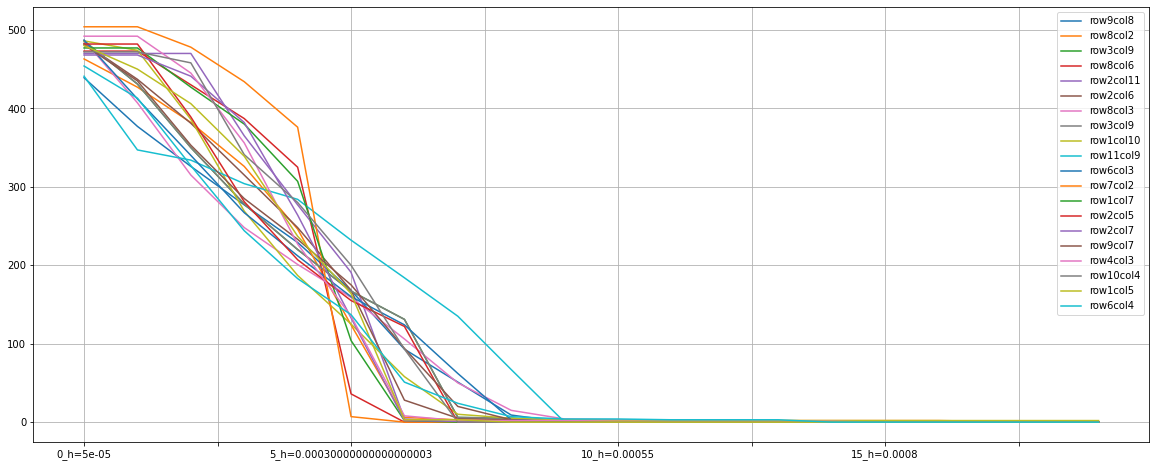

In [42]:
#come cambia in funzione della height il numero di picchi che vengono trovati?
dic = pd.DataFrame({})
feath = []
for n,pr in enumerate(np.linspace(0.5*10**-4,10**-3,20)): # INTERVALLO 10^-6 10-3
    cl = classes.Spettri(data1,npicchi=None,prop={'height':pr,'prominence':(None,None),'width':(None,None)})
    
    cl.peakfinder()
    feath.append(cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_h={pr}']= feath[n]['count']
    del cl
    
dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],20)].plot(figsize=(20,8),grid=True, xlim=(None,None))


#### WIDTH (SO SO)

Text(0, 0.5, 'n_picchi')

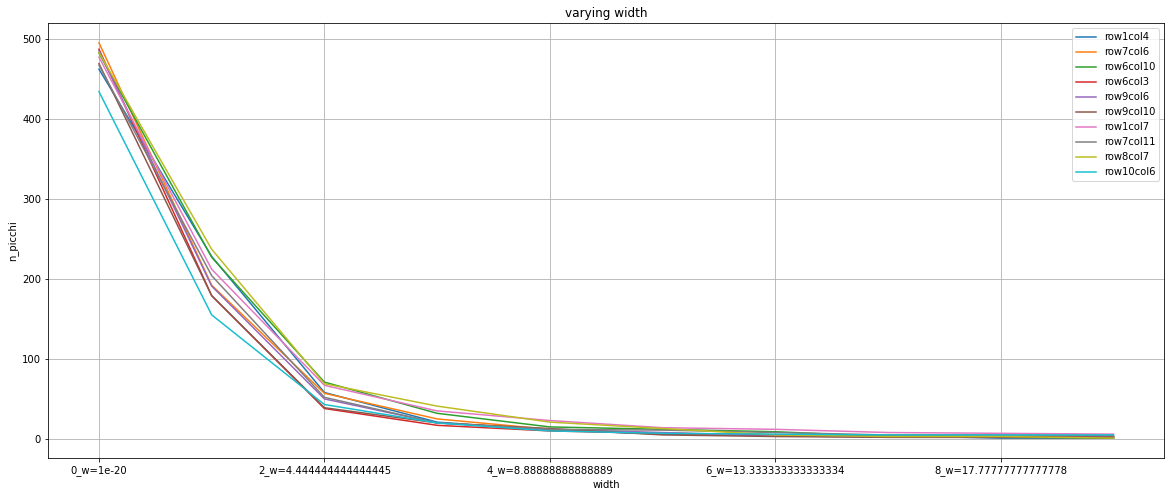

In [12]:
dic = pd.DataFrame({})
featw = []
for n,pr in enumerate(np.linspace(10**-20,20,10)): #INTERVALLO
    cl = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':(None,None),'width':pr})
    
    cl.peakfinder()
    featw.append( cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_w={pr}']= featw[n]['count']
    del cl
    
fig =dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],10)].plot(figsize=(20,8),grid=True, xlim=(None,None), title = 'varying width' )
plt.xlabel('width')
plt.ylabel('n_picchi')


### OSSERVAZIONI:

**PROMINENCE**
- parametro affidabile che permette la riproducibilità per regolare la ricerca dei parametri
- possibile iperparametro importante per il preprocessing 
- per contro per la classificazione probabilmente non avrà un grande rilevanza
**WIDTH** ED **HEIGHT**
- meno affidabili per la ricerca di picchi come preprocessing
- probabilmente più informative riguardo clusterizzazio e classificazione

## Qualche plot per visualizzare spettri e picchi

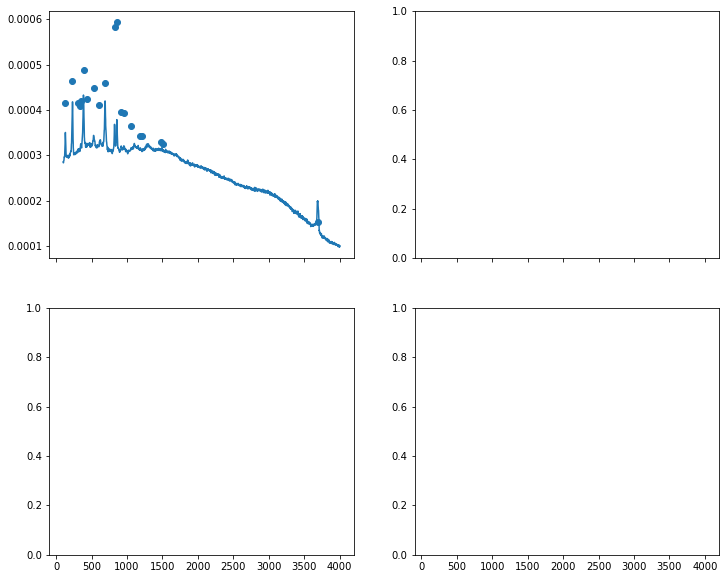

In [36]:
fig, ax = plt.subplots(2,2,sharex = True)

fig.set_size_inches(12,10)
picchi = classes.Spettri(data1,npicchi=20)
picchi.peakfinder()
# nonono --> dfpeak = {key : picchi.picchi[x] for key in [f'row{n}col{m}' for n in range (1,12) for m in range(1,12)] for x in range(len(picchi.picchi))}
ax[0,0].scatter(dfpeak['row2col3']['K'],dfpeak['row2col3']['peak_heights'])
ax[0,0].plot(picchi.data['K'],picchi.data['row2col3'])


In [16]:
picchi1.peakfinder()
picchi1.picchi[0]

,peak_heights,prominences,left_bases,right_bases,peak_ind_row1col1,K
0,0.000511,0.000180,3,2690,501,824.1054
1,0.000475,0.000143,3,477,297,529.0499
2,0.000487,0.000118,511,2690,523,855.9251
3,0.000427,0.000092,3,110,35,150.1060
4,0.000400,0.000063,69,110,92,233.0301
...,...,...,...,...,...,...
275,0.000325,0.000002,617,628,623,1000.5600
276,0.000142,0.000002,2268,2275,2271,3384.1460
277,0.000371,0.000002,383,402,401,679.4703
278,0.000208,0.000002,1793,2690,1795,2695.6830


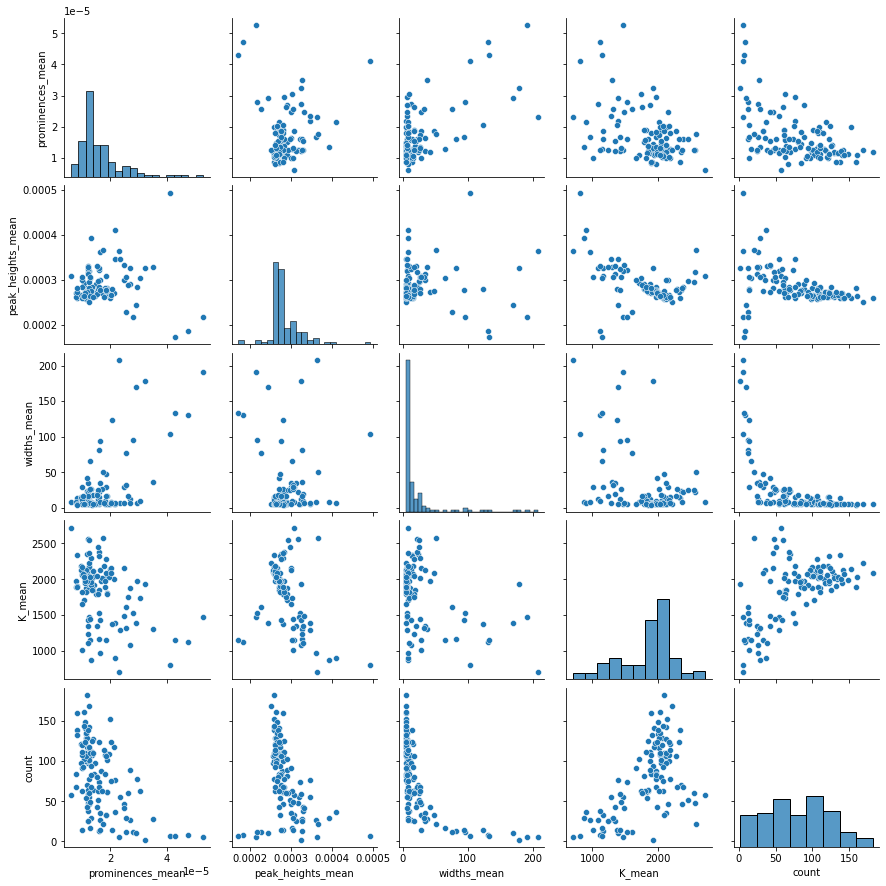

In [49]:
#sns.pairplot(data = featp[5], vars = ['prominences_mean','peak_heights_mean','widths_mean','K_mean','count'])

In [50]:
#sns.pairplot(data = featp[2], vars = ['prominences_std','peak_heights_std','widths_std','count'])

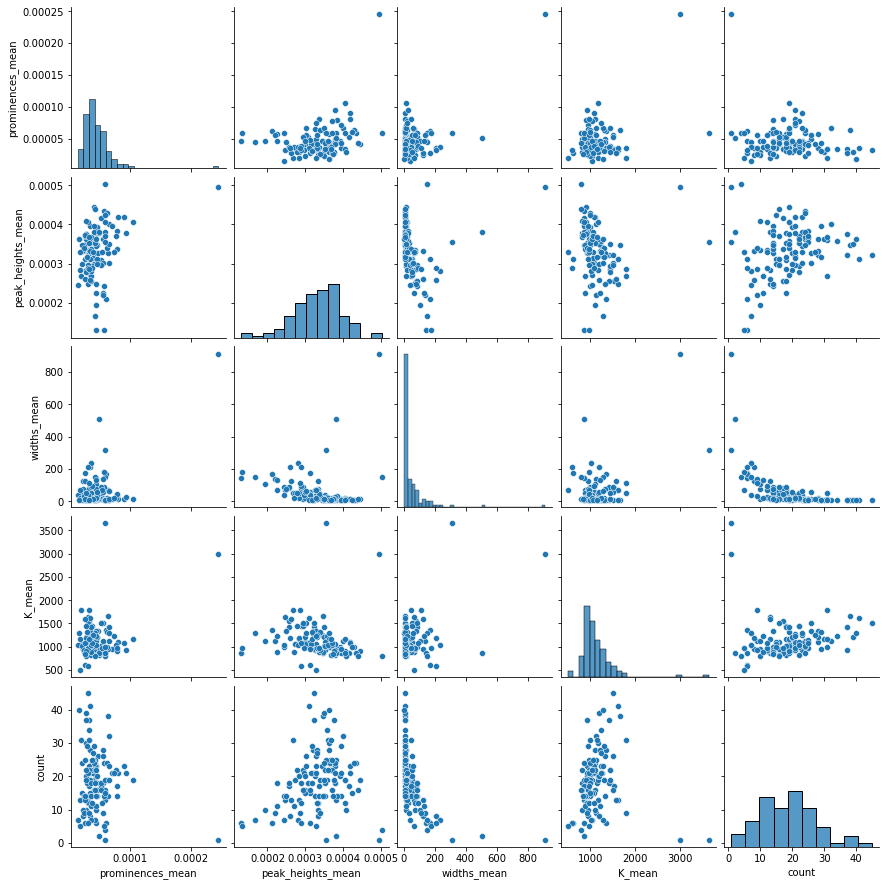

In [51]:
#sns.pairplot(data = featp[10], vars = ['prominences_mean','peak_heights_mean','widths_mean','K_mean','count'])

In [ ]:
#questa è una routine base prima normalizza i dati e poi ne calcola i picchi
# le proprietà sono salvate come attributo dell'istanza [.picchi è un attributo aggiuntivo creato .peakfinder() ]

picchi1.peakfinder()
picchi2.peakfinder()
pass

In [ ]:
#per ora utilizzo un metodo per l'estrazione delle feature senza che esso salvi il risultato in nessun attributo ma ritornandolo
feat_picchi1= picchi1.featextract(cols=['peak_heights','prominences','K'],statlist=['mean','std','count'])
feat_picchi2 = picchi2.featextract(cols=['peak_heights','prominences','K'], statlist=['mean','std','count'])
km1_list= cluster_routine.km_cluster_plt(feat_picchi1,plot=True)
km2_list =  cluster_routine.km_cluster_plt(feat_picchi2.dropna(),plot=True)
feat_picchi1['labels_km']=  km1_list[3].labels_
feat_picchi2['labels_km']= km2_list[3].labels_

In [ ]:
feat_picchi1

In [ ]:
sns.pairplot(data=feat_picchi1,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_km')

In [ ]:
sns.pairplot(data=feat_picchi2,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_km')

In [ ]:
score1=[]
for x in km1_list:
    
    score1.append(cluster_routine.silhouette_score(feat_picchi1,x.labels_))

In [ ]:
score2=[]
for x in km2_list:
    
    score2.append(cluster_routine.silhouette_score(feat_picchi2,x.labels_))

In [ ]:
score1

In [ ]:
sns.lineplot(data=score1,label='score1')
sns.lineplot(data=score2,label='score2')

In [ ]:
db1list = cluster_routine.db_cluster_plt(feat_picchi1,n_components=2, eps= 0.55, min_samples=4)


In [ ]:
db2list = cluster_routine.db_cluster_plt(feat_picchi2)

In [ ]:
feat_picchi2['labels_db'] = db2list[-2].labels_
feat_picchi1['labels_db'] = db1list[4].labels_

sns.pairplot(data=feat_picchi2,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_db')

In [ ]:

sns.pairplot(data=feat_picchi1,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_db')